In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from pythonlibs.torch_lib1 import *
print(README)

Common Library for PyTorch
Author: M. Akaishi


In [5]:
p = nn.AdaptiveAvgPool2d((1, 1))
print(p)

l1 = nn.Linear(32, 10)
print(l1)

AdaptiveAvgPool2d(output_size=(1, 1))
Linear(in_features=32, out_features=10, bias=True)


In [7]:
m = nn.AdaptiveAvgPool2d((5, 7))
input = torch.randn(1, 64, 8, 9)
print(m(input).shape)

input2 = torch.randn(1, 64, 32, 30)
print(m(input2).shape)

torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 5, 7])


In [8]:
inputs = torch.randn(100, 32, 16, 16)
m1 = p(inputs)
m2 = m1.view(m1.shape[0], -1)
m3 = l1(m2)

print(m1.shape)
print(m2.shape)
print(m3.shape)

torch.Size([100, 32, 1, 1])
torch.Size([100, 32])
torch.Size([100, 10])


In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
n_output = len(classes)

print(n_output)

10


In [10]:
transform_train = transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

transform = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [11]:
data_root = './data'

train_set = datasets.CIFAR10(
    root=data_root,
    train=True,
    download=True,
    transform=transform_train
)

test_set = datasets.CIFAR10(
    root=data_root,
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
batch_size = 50

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [13]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [15]:
weights = models.AlexNet_Weights.IMAGENET1K_V1
net = models.alexnet(weights=weights)

In [16]:
print(net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
summary(net, (100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [100, 1000]               --
├─Sequential: 1-1                        [100, 256, 2, 2]          --
│    └─Conv2d: 2-1                       [100, 64, 27, 27]         23,296
│    └─ReLU: 2-2                         [100, 64, 27, 27]         --
│    └─MaxPool2d: 2-3                    [100, 64, 13, 13]         --
│    └─Conv2d: 2-4                       [100, 192, 13, 13]        307,392
│    └─ReLU: 2-5                         [100, 192, 13, 13]        --
│    └─MaxPool2d: 2-6                    [100, 192, 6, 6]          --
│    └─Conv2d: 2-7                       [100, 384, 6, 6]          663,936
│    └─ReLU: 2-8                         [100, 384, 6, 6]          --
│    └─Conv2d: 2-9                       [100, 256, 6, 6]          884,992
│    └─ReLU: 2-10                        [100, 256, 6, 6]          --
│    └─Conv2d: 2-11                      [100, 256, 6, 6]         

In [24]:
print(net.classifier[6].in_features)
print(net.classifier[6].out_features)
print(net.classifier[6].bias.shape)

4096
1000
torch.Size([1000])


In [26]:
torch_seed()

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, n_output)

In [27]:
print(net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [28]:
torch_seed()

weights = models.AlexNet_Weights.IMAGENET1K_V1
net = models.alexnet(weights=weights)

in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, n_output)

net = net.to(device)
lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

history = np.zeros((0, 5))

In [ ]:
num_epochs = 5
history = fit(net, optimizer, criterion, num_epochs, 
        train_loader, test_loader, device, history)

In [ ]:
evaluate_history(history)

In [ ]:
show_images_labels(test_loader, classes, net, device)

## GoogLeNet

In [30]:
from torchvision import models

weights = models.GoogLeNet_Weights.IMAGENET1K_V1
net = models.googlenet(weights=weights)

In [31]:
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [32]:
summary(net, (100, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [100, 1000]               --
├─BasicConv2d: 1-1                       [100, 64, 112, 112]       --
│    └─Conv2d: 2-1                       [100, 64, 112, 112]       9,408
│    └─BatchNorm2d: 2-2                  [100, 64, 112, 112]       128
├─MaxPool2d: 1-2                         [100, 64, 56, 56]         --
├─BasicConv2d: 1-3                       [100, 64, 56, 56]         --
│    └─Conv2d: 2-3                       [100, 64, 56, 56]         4,096
│    └─BatchNorm2d: 2-4                  [100, 64, 56, 56]         128
├─BasicConv2d: 1-4                       [100, 192, 56, 56]        --
│    └─Conv2d: 2-5                       [100, 192, 56, 56]        110,592
│    └─BatchNorm2d: 2-6                  [100, 192, 56, 56]        384
├─MaxPool2d: 1-5                         [100, 192, 28, 28]        --
├─Inception: 1-6                         [100, 256, 28, 28]        --
│

In [35]:
display(weights.meta['categories'])
print(len(weights.meta['categories']))

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

1000


In [36]:
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [38]:
summary(net, (100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [100, 1000]               --
├─BasicConv2d: 1-1                       [100, 64, 56, 56]         --
│    └─Conv2d: 2-1                       [100, 64, 56, 56]         9,408
│    └─BatchNorm2d: 2-2                  [100, 64, 56, 56]         128
├─MaxPool2d: 1-2                         [100, 64, 28, 28]         --
├─BasicConv2d: 1-3                       [100, 64, 28, 28]         --
│    └─Conv2d: 2-3                       [100, 64, 28, 28]         4,096
│    └─BatchNorm2d: 2-4                  [100, 64, 28, 28]         128
├─BasicConv2d: 1-4                       [100, 192, 28, 28]        --
│    └─Conv2d: 2-5                       [100, 192, 28, 28]        110,592
│    └─BatchNorm2d: 2-6                  [100, 192, 28, 28]        384
├─MaxPool2d: 1-5                         [100, 192, 14, 14]        --
├─Inception: 1-6                         [100, 256, 14, 14]        --
│

In [43]:
print(net.fc)
print(net.fc.in_features)
print(net.fc.out_features)
print(n_output)

Linear(in_features=1024, out_features=1000, bias=True)
1024
1000
10


In [45]:
torch_seed()

in_features = net.fc.in_features
net.fc = nn.Linear(in_features, n_output)

In [46]:
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [54]:
torch_seed()

weights = models.GoogLeNet_Weights.IMAGENET1K_V1
net = models.googlenet(weights=weights)

in_features = net.fc.in_features
net.fc = nn.Linear(in_features, n_output)
net = net.to(device)

lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

history = np.zeros((0, 5))

In [55]:
num_epochs = 5
history = fit(net, optimizer, criterion, num_epochs, 
        train_loader, test_loader, device, history)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.03648 acc: 0.42436 val_loss: 0.02359, val_acc: 0.70150


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.02217 acc: 0.66958 val_loss: 0.01401, val_acc: 0.79320


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.01647 acc: 0.73914 val_loss: 0.01065, val_acc: 0.83450


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.01382 acc: 0.77484 val_loss: 0.00883, val_acc: 0.85720


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.01227 acc: 0.79680 val_loss: 0.00778, val_acc: 0.87090


초기상태 : 손실 : 0.02359  정확도 : 0.70150
최종상태 : 손실 : 0.00778 정확도 : 0.87090


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

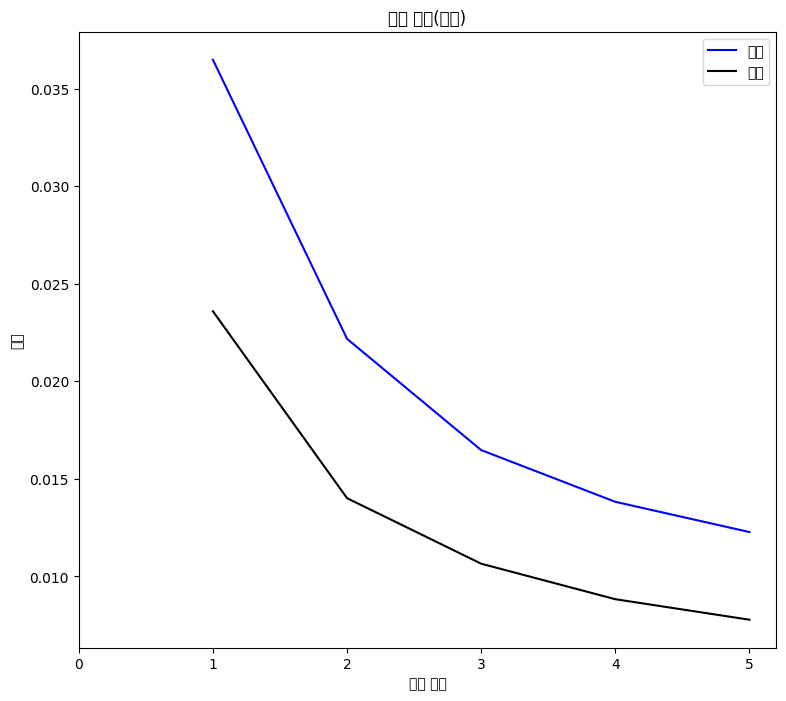

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


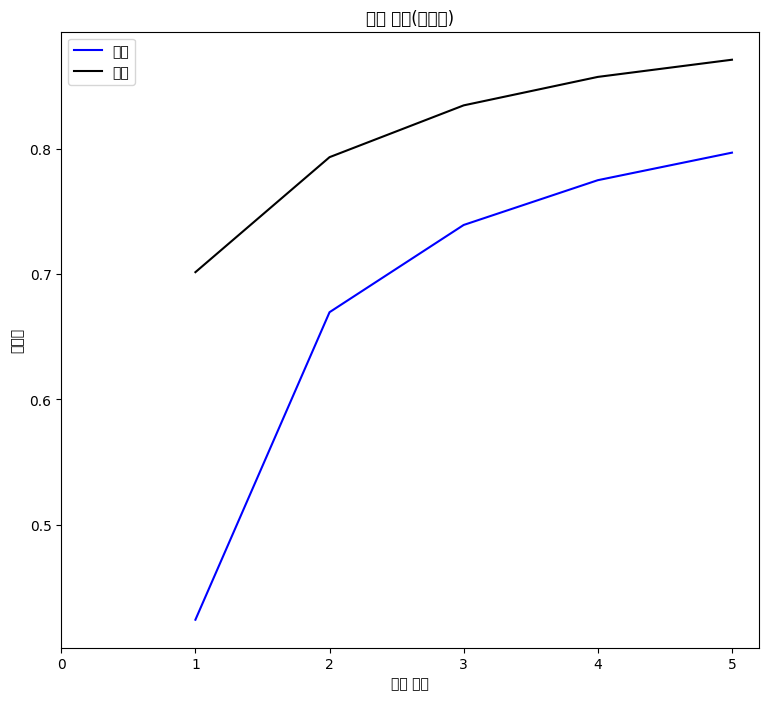

In [56]:
evaluate_history(history)

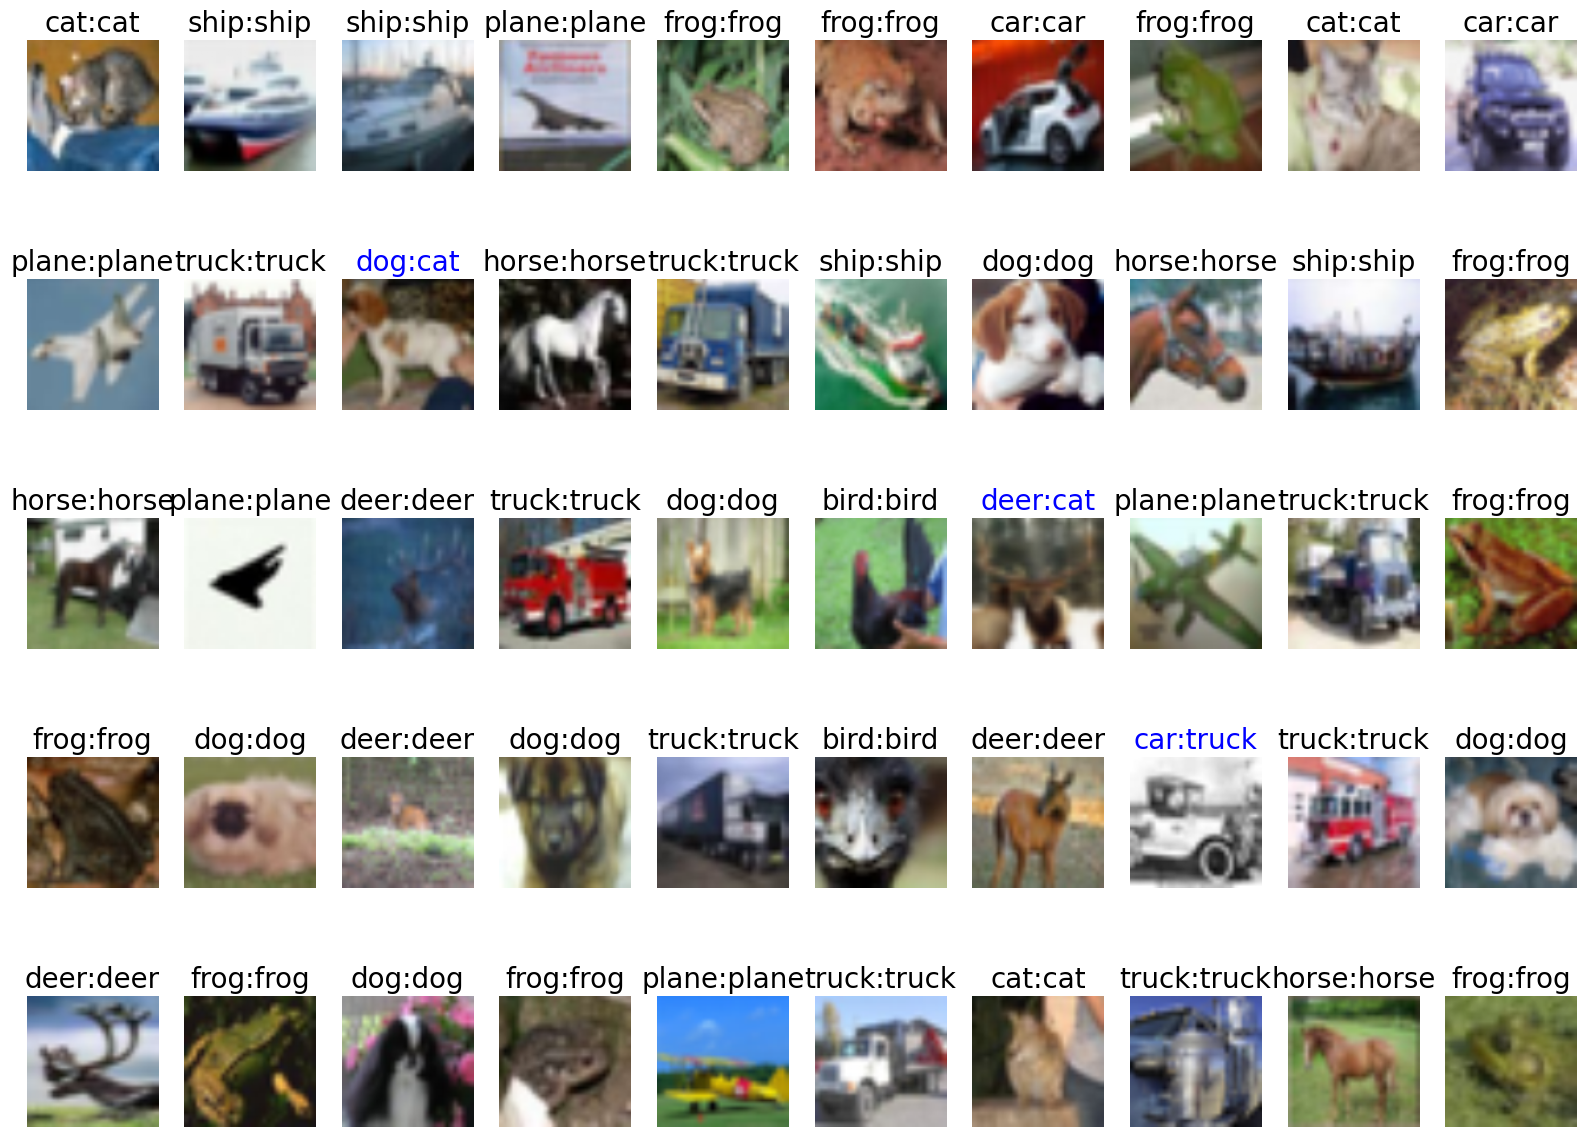

In [57]:
show_images_labels(test_loader, classes, net, device)